# Evaluar un modelo de Machine Learning

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
workflow = [
    "1. Obtener y preparar los datos",
    "2. Dividir los datos",
    "3. Elegir el mejor modelo/estimador/algoritmo para nuestro problema y sus hiperparámetros**",
    "4. Ajustar el modelo/algoritmo a los datos de entrenamiento",
    "5. Hacer predicciones",
    "6. Evaluar el modelo",
    "7. Mejorar el modelo",
    "8. Guardar y cargar el modelo"
]

In [3]:
workflow

['1. Obtener y preparar los datos',
 '2. Dividir los datos',
 '3. Elegir el mejor modelo/estimador/algoritmo para nuestro problema y sus hiperparámetros**',
 '4. Ajustar el modelo/algoritmo a los datos de entrenamiento',
 '5. Hacer predicciones',
 '6. Evaluar el modelo',
 '7. Mejorar el modelo',
 '8. Guardar y cargar el modelo']

### Problema de **regresión**

[Conjunto de datos de vivienda de California](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) 📊

In [4]:
# Regression data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() # cargar como diccionario

# Convertir el diccionario en DataFrame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Obtener la variable objetivo
housing_df["target"] = pd.Series(housing["target"])

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Problema de **clasificación**

In [5]:
heart_disease = pd.read_csv("../../data/raw/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Importar la clase estimadora RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Configurar semilla aleatoria
np.random.seed(42)

# Crear los datos
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciar RandomForestClassifier
rfc = RandomForestClassifier()

# Ajustar el modelo a los datos (entrenar un modelo de ML)
rfc.fit(X_train, y_train)

# Evaluar el RandomForestClassifier
rfc.score(X_test, y_test)

0.8524590163934426

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Hacer predicciones en modelos de **clasificación**

In [8]:
rfc.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Hay 3 formas de hacer lo mismo:

In [9]:
# Comparar las predicciones con las etiquetas verdades utilizando operadores lógicos
y_preds = rfc.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [10]:
rfc.score(X_test, y_test)

0.8524590163934426

`.score()` calcula una métrica de desempeño estándar:
* precisión para clasificación
* R² para regresión

In [11]:
# Métricas específicas de Scikit-Learn (módulo 'metrics')
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [12]:
rfc.predict_proba(X_test[:5]) # Devuelve una matriz donde cada fila es una instancia y cada columna es la probabilidad de una clase

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

Haz predicciones con `predict_proba()`:
- usa esto si alguien te pregunta *"¿cuál es la probabilidad que tu modelo asigna a cada predicción?"*

In [13]:
rfc.predict(X_test[:5]) # Genera predicciones concretas basadas en el modelo ajustado

array([0, 1, 1, 0, 1])

`predict()` también puede usarse en modelos de regresión.

In [14]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Hacer predicciones en modelos de **regresión**

In [15]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Crear los datos
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear la instancia del modelo
model = RandomForestRegressor()

# Ajustar modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_preds = model.predict(X_test)

In [16]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [17]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [18]:
# Comparar las predicciones con los valores verdades
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [19]:
len(y_test)

4128

# Evaluar un modelo de machine learning

Tres formas de evaluar modelos/estimadores de Scikit-Learn:

1. Método `score()` incorporado del estimador
2. El parámetro de puntuación `scoring`
3. Funciones de métrica específicas del problema

🔗 https://scikit-learn.org/stable/modules/model_evaluation

## **Clasificación**

### Evaluar un modelo con el método `score`

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)

# Crear X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear instancia del modelo
rfc = RandomForestClassifier()

# Ajustar el modelo
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc.score(X_train, y_train) # El valor más alto del método .score() es 1.0

1.0

In [22]:
rfc.score(X_test, y_test)

0.8524590163934426

**Cross-Validation**: Divide los datos en múltiples partes para entrenar y probar el modelo varias veces, asegurando una evaluación más robusta y menos dependiente de una sola división de datos.

In [23]:
cross_val_score(rfc, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [24]:
cross_val_score(rfc, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [25]:
np.random.seed(42)

# Puntuación única de entrenamiento y prueba
rfc_single_score = rfc.score(X_test, y_test)

# Tomar la media de la puntuación de validación cruzada de 5 pliegues
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y, cv=5))

# Comparar los dos
rfc_single_score, rfc_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [26]:
# Parámetro de puntuación predeterminado del clasificador = media accuracy
# rfc.score()

In [27]:
# El parámetro de puntuación se establece en None por defecto
cross_val_score(rfc, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Métricas de evaluación del modelo de **clasificación** 

* Accuracy (Precisión)
* Área bajo la curva ROC  
* Matriz de confusión  
* Informe de clasificación

#### **Accuracy**

Porcentaje de predicciones correctas entre el total de predicciones.

In [28]:
np.random.seed(42)

rfc = RandomForestClassifier()
cross_val_score = cross_val_score(rfc, X, y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

In [29]:
print(f"Precisión validada por cruce del clasificador de enfermedades del corazón: {np.mean(cross_val_score) *100:.2f}%")

Precisión validada por cruce del clasificador de enfermedades del corazón: 82.48%


#### **Área bajo la curva característica del receptor (AUC/ROC)**

* Área bajo la curva (AUC)
* Curva ROC

Las curvas ROC son una comparación de la **tasa de verdaderos positivos** (tpr) de un modelo frente a la **tasa de falsos positivos** (fpr) de un modelo.

* Verdadero positivo = el modelo predice 1 cuando la verdad es 1
* Falso positivo = el modelo predice 1 cuando la verdad es 0
* Verdadero negativo = el modelo predice 0 cuando la verdad es 0
* Falso negativo = el modelo predice 0 cuando la verdad es 1

In [30]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ajustar el modelo
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import roc_curve

# Hacer predicciones con probabilidades
y_probs = rfc.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [32]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [33]:
# Calcular fpr (tasa falsos positivos), tpr (tasa verdaderos positivos) y thresholds (umbrales)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Ver las tasas de falsos positivos
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

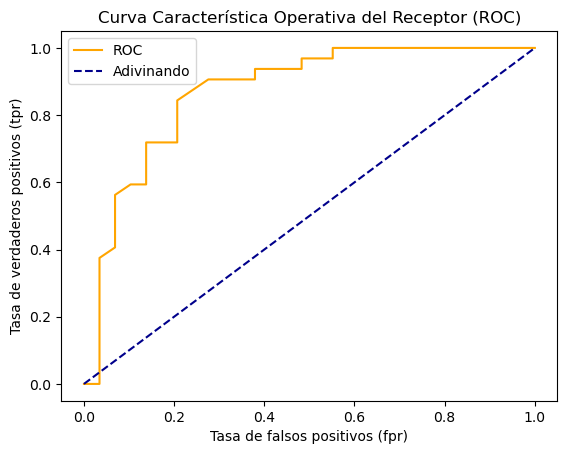

In [34]:
# Crear una función para trazar curvas ROC
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Traza una curva ROC dada la tasa de falsos positivos (fpr)
    y la tasa de verdaderos positivos (tpr) de un modelo.
    """
    # Trazar la curva roc
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Trazar la línea sin poder predictivo (línea base)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Adivinando")
    
    # Personalizar el gráfico
    plt.xlabel("Tasa de falsos positivos (fpr)")
    plt.ylabel("Tasa de verdaderos positivos (tpr)")
    plt.title("Curva Característica Operativa del Receptor (ROC)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

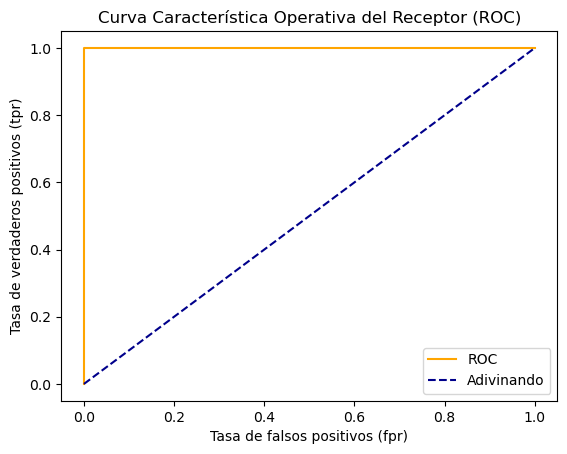

In [36]:
# Grafica la curva ROC perfecta y la puntuación AUC
fpr, tpr, umbrales = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [37]:
# Puntuación AUC perfecto
roc_auc_score(y_test, y_test)

1.0

#### **Matriz de confusión**

La siguiente forma de evaluar un modelo de clasificación es utilizando una [matriz de confusión](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n).

Una [matriz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix) es una manera rápida de comparar las etiquetas que un modelo predice y las etiquetas reales que se suponía que debía predecir.

En esencia, te da una idea de dónde el modelo se está confundiendo.

In [38]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

Una forma de hacer esto es con `pd.crosstab()`:

In [39]:
# Visualizar matriz de confusión con pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


In [40]:
23 + 6 + 6 +26

61

In [41]:
len(X_test)

61

<Axes: >

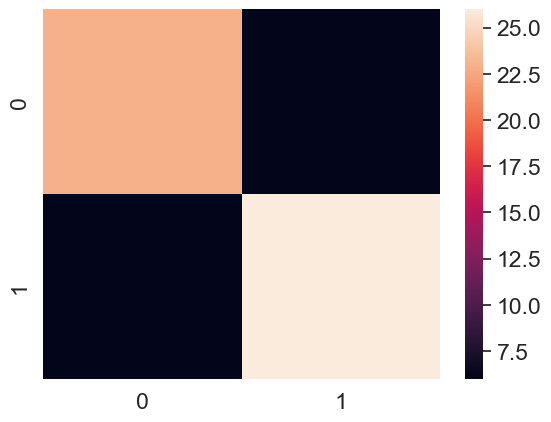

In [42]:
# Hacer nuestra matriz de confusión más visual usando heatmap() de Seaborn
import seaborn as sns

# Configurar la escala
sns.set(font_scale=1.5)

# Crear la matriz de confusión
matrix = confusion_matrix(y_test, y_preds)

# Graficar usando Seaborn
sns.heatmap(matrix)

#### Creando una matriz de confusión usando Scikit-Learn  

Scikit-Learn tiene múltiples implementaciones diferentes para graficar matrices de confusión:

* `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)` - esto toma un estimador ajustado (como nuestro modelo clf), características (X) y etiquetas (y), luego utiliza el estimador entrenado para hacer predicciones sobre X y compara las predicciones con y mostrando una matriz de confusión.  
* `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` - esto toma etiquetas de verdad y etiquetas predichas y las compara mostrando una matriz de confusión.  

In [43]:
# Para verificar tu versión de Scikit-Learn, ejecuta:
import sklearn
sklearn.__version__

'1.5.1'

Si tu no tienes 1.0+, puedes actualizarla: https://scikit-learn.org/stable/install.html

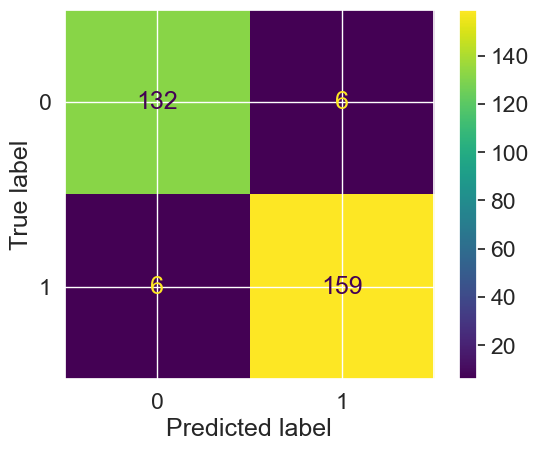

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=X, y=y);

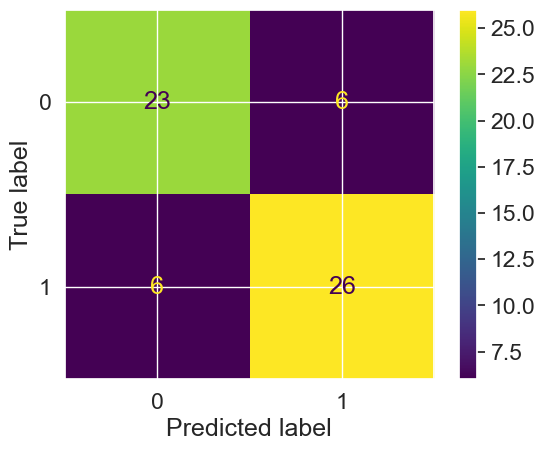

In [45]:
# Trazar matriz de confusión a partir de predicciones
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

#### **Classification Report**

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [47]:
# Donde la precision y la recall se vuelven valiosas
disease_true = np.zeros(10000)
disease_true[0] = 1 # solo un caso positivo

disease_preds = np.zeros(10000) # el modelo predice cada caso como 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Para resumir las métricas de clasificación:

* La **accuracy** es una buena medida para comenzar si todas las clases están **equilibradas** (por ejemplo, la misma cantidad de muestras etiquetadas con 0 o 1).
* La **precision** y el **recall** se vuelven más importantes cuando las clases están **desbalanceadas**.
* Si las predicciones de falsos positivos son peores que las de falsos negativos, apunte a una mayor precision.
* Si las predicciones de falsos negativos son peores que las de falsos positivos, apunte a un mayor recall.
* El **F1-score** es una combinación de precision y recall.

### Uso del parámetro `scoring`

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # si scoring=None, se utiliza la métrica de evaluación de puntuación por defecto del estimador (accuracy para modelos de clasificación)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [49]:
# Cross-validated accuracy
print(f"La accuracy validada cruzadamente es: {np.mean(cv_acc)*100:.2f}%")

La accuracy validada cruzadamente es: 82.48%


In [50]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [51]:
# Cross-validated accuracy
print(f"La accuracy validada cruzadamente es: {np.mean(cv_acc)*100:.2f}%")

La accuracy validada cruzadamente es: 82.48%


In [52]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [53]:
# Cross-validated precision
print(f"La precision validada cruzadamente es: {np.mean(cv_precision)*100:.2f}%")

La precision validada cruzadamente es: 83.30%


In [54]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [55]:
# Cross-validated recall
print(f"La recall validada cruzadamente es: {np.mean(cv_recall)*100:.2f}%")

La recall validada cruzadamente es: 85.45%


### Usando diferentes métricas de evaluación como funciones de Scikit-Learn  

La tercera forma de evaluar modelos/estimadores de aprendizaje automático de scikit-learn es utilizando el módulo `sklearn.metrics` - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


## **Regresión**
### Métricas de evaluación de modelos de **regresión**  

Documentación de métricas de evaluación de modelos - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics  

Las que vamos a ver son:  

* R^2 (pronunciado r-cuadrado) o coeficiente de determinación  
* Error absoluto medio (MAE)  
* Error cuadrático medio (MSE)

In [57]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Crear los datos
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear la instancia del modelo
model = RandomForestRegressor()

# Ajustar modelo
model.fit(X_train, y_train)

RandomForestRegressor()

#### **R^2**

Lo que hace R-cuadrado: Compara las predicciones de tu modelo con la media de los objetivos. Los valores pueden variar desde menos infinito (un modelo muy pobre) hasta 1. Por ejemplo, si todo lo que hace tu modelo es predecir la media de los objetivos, su valor de R^2 sería 0. Y si tu modelo predice perfectamente un rango de números, su valor de R^2 sería 1.

In [58]:
# La métrica de evaluación score() predeterminada es r_cuadrado para algoritmos de regresión
# Más alto = 1.0, más bajo = 0.0
model.score(X_test, y_test)

0.8059809073051385

In [59]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [60]:
y_test.mean()

2.0550030959302323

In [61]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [62]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_mean)

0.0

In [63]:
r2_score(y_test, y_test)

1.0

#### **Mean absolute error (MAE)** - Error absoluto medio

El MAE es el promedio de las diferencias absolutas entre las predicciones y los valores reales.

Te da una idea de cuán equivocadas están las predicciones de tus modelos.

In [64]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [65]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [66]:
# MAE utilizando fórmulas y diferencias
np.abs(df["differences"]).mean()

0.3270458119670544

#### **Mean squared error (MSE)** - Error cuadrático medio (ECM)

El MSE es la media del cuadrado de los errores entre los valores reales y los valores predichos.

In [67]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

0.2542443610174998

In [68]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [69]:
# Calcular MSE a mano
squared = np.square(df["differences"])
squared.mean()

0.2542443610174998

In [70]:
df_large_error = df.copy()
df_large_error.loc[0, "squared_differences"] = 16  # Asignación directa
df_large_error.loc[0]

actual values           4.526000
predicted values        4.262093
differences            -0.263907
squared_differences    16.000000
Name: 0, dtype: float64

In [71]:
# Calcular MSE con un error grande
df_large_error["squared_differences"].mean()

0.2581034581564988

In [72]:
# Aumentar artificialmente el error en la columna "squared_differences" para ~100 muestras
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,20.000000
15663,5.00001,4.935016,-0.064994,20.000000
20484,2.18600,2.558640,0.372640,20.000000
9814,2.78000,2.334610,-0.445390,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [73]:
df_large_error["squared_differences"].mean()

0.7342474696682847

### Uso del parámetro `scoring`

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [75]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6538469004539024

In [76]:
cv_r2

array([0.61899722, 0.72073286, 0.62181062])

In [77]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42995279896739047

In [78]:
cv_mse

array([-0.52415422, -0.34606945, -0.37337966, -0.44186726, -0.4642934 ])

In [79]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4663111819040699

In [80]:
cv_mae

array([-0.54587517, -0.40931278, -0.4388763 , -0.46484301, -0.47264865])

### Usando diferentes métricas de evaluación como funciones de Scikit-Learn  

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998
